# Solar position algorithms

The position of the sun in the sky can be described using two different angles:

* the **solar elevation** (&gamma;<sub>S</sub>): angle between the sun and the horizontal plane
* the **solar azimuth** (&psi;<sub>S</sub>): angle between the projection of the sun on the horizontal plane and the south direction (which is typically at 0°)

In some cases, the solar elevation is described using its complementary angle, which is the zenith angle: &theta;<sub>Z</sub> = 90° - &gamma;<sub>S</sub>

The value of the elevation and azimuth angle depends on location (latitude and longitude), date, and time of day. However, it should be noted that the Sun's position in the sky doesn't exactly match its true position relative to Earth because Earth's atmosphere bends its light. This bending, called atmospheric refraction, slightly reduces the Sun's elevation (and zenith) angle. So, we need to distinguish between two types of elevation/zenith angles:

* True elevation/zenith angle – based on the actual position of the Sun.
* Apparent elevation/zenith angle – includes the bending effect of the atmosphere.

For more information on atmospheric refraction, the reader is referred to <a href="refraction_introduction.ipynb">Atmoshperic refraction</a>

```{figure} /figures/solar_angles.jpg
    :alt: solar_angles
    :width: 500px
    :align: center
```

<div style="text-align: center;">
  <small>Figure 1: Solar elevation and azimuth (source: Fundamentals of Solar Cells and Photovoltaic Systems Engineering).</small>
</div>


Solar position algorithms (SPAs) are mathematical models used to accurately calculate the position of the sun in the sky at any given time and location on Earth. These algorithms provide key solar angles such as solar zenith, solar elevation, and azimuth, which are crucial for applications in solar energy systems, climate modeling, architecture, and astronomy. The solar position calculations, using these algorithms, are based on predicting the Earth's irregular rotation around the Sun using historical observations. This has caused users to develop different algorithms with different sets of coefficients that are accurate for a specific number of years.

In general, SPAs can take as input:
* Geographic coordinates (latitude and longitude)
* Date and time
* Atmospheric conditions (temperature and pressure)
* Altitude above sea level

Below, we calculate the solar position at the Technical University of Denmark on 2025/06/21, using *pvlib*'s default solar position algorithm (NREL SPA [1]).

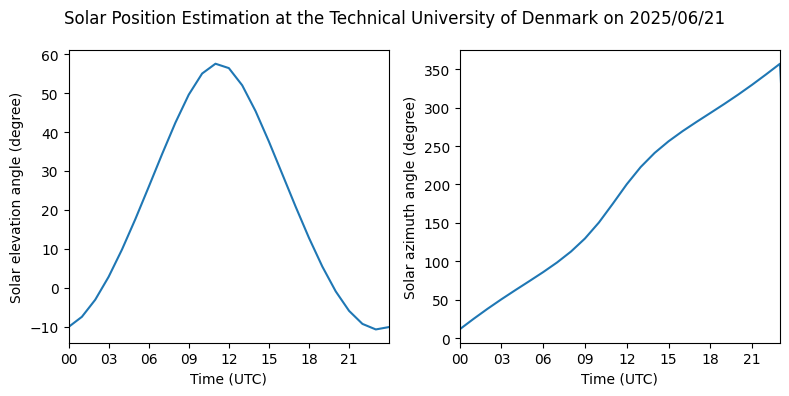

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import pvlib
from pvlib.location import Location
import matplotlib.dates as mdates

# Definition of Location object
site = Location(55.79, 12.52, 'UTC', 50, 'DTU, Denmark') # latitude, longitude, time_zone, altitude, name

# Definition of a time range of simulation
times = pd.date_range('2025-06-21 00:00:00', '2025-06-22 00:00:00', freq='h', tz=site.tz)

# Find solar position
solpos = pvlib.solarposition.get_solarposition(times, site.latitude, site.longitude, site.altitude)

# Plots for solar zenith and solar azimuth angles
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))
fig.suptitle('Solar Position Estimation at the Technical University of Denmark on 2025/06/21')

# plot for solar elevation angle
ax1.plot(solpos.elevation)
ax1.set_ylabel('Solar elevation angle [°]')
ax1.set_xlabel('Time (UTC)')
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%H'))
ax1.set_xlim(pd.Timestamp('2025-06-21 00:00:00'), pd.Timestamp('2025-06-21 23:59:00'))

# plot for solar azimuth angle
ax2.plot(solpos.azimuth)
ax2.set_ylabel('Solar azimuth angle [°]')
ax2.set_xlabel('Time (UTC)')
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%H'))
ax2.set_xlim(pd.Timestamp('2025-06-21 00:00:00'), pd.Timestamp('2025-06-21 23:00:00'))
plt.tight_layout()
plt.show()

#### Comparison of two different SPAs

Compare the accuracy of *Skyfield* [2] (high-precision tool for calculating the solar position) with the *Michalsky* model [3]

In [33]:
times = pd.date_range('2025-01-01 00:00:00', '2025-12-31 23:59:00', freq='h', tz='UTC')
site = Location(55.79, 12.52, 'UTC', 50, 'DTU, Denmark') # latitude, longitude, time_zone, altitude, name

michalsky = solposx.solarposition.michalsky(times, site.latitude, site.longitude)
skyfield = solposx.solarposition.skyfield(times, site.latitude, site.longitude)

comparison = solposx.tools.calc_error(michalsky['elevation'], michalsky['azimuth'], skyfield['elevation'], skyfield['azimuth'])

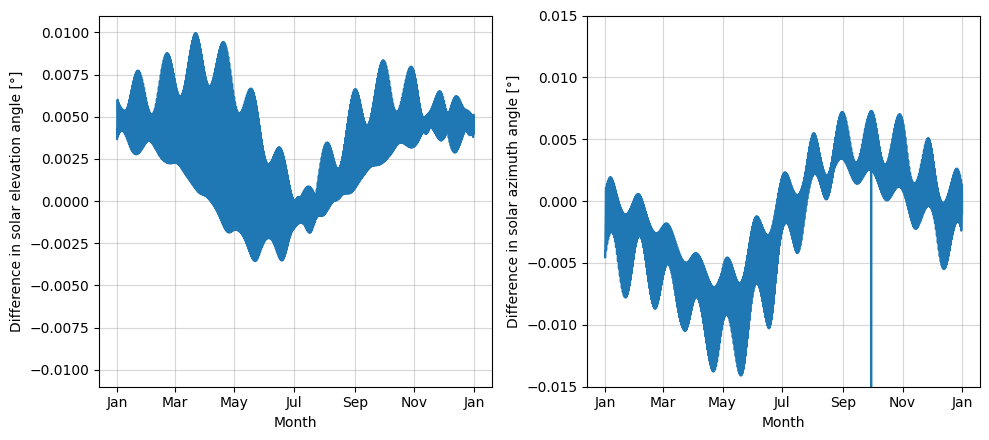

In [32]:
fig, axes = plt.subplots(1,2, figsize=(10, 4.5), facecolor='w', edgecolor='k')

axes[0].plot(michalsky['elevation']-skyfield['elevation'])
axes[1].plot(michalsky['azimuth']-skyfield['azimuth'])

axes[0].set_ylabel('Difference in solar elevation angle [°]')
axes[0].set_ylim(-0.011, 0.011)

axes[1].set_ylabel('Difference in solar azimuth angle [°]')
axes[1].set_ylim(-0.015, 0.015)

for ax in axes:
    ax.set_xlabel('Month')
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
    ax.grid(alpha=0.5, zorder=-2)

plt.tight_layout()
plt.show()

In [36]:
print(f'The RMSD of the Michalsky model to Skyfield for elevation angle is: {comparison['zenith_rmsd'].round(4)} degrees')

The RMSD of the Michalsky model to Skyfield for elevation angle is: 0.0043 degrees


In [35]:
print(f'The RMSD of the Michalsky model to Skyfield for azimuth angle is: {comparison['azimuth_rmsd'].round(4)} degrees')

The RMSD of the Michalsky model to Skyfield for azimuth angle is: 0.0048 degrees


#### References

[1] I. Reda and A. Andreas, "Solar Position Algorithm for Solar Radiation Applications," NREL Report No. TP-560-34302, pp. 55, 2008, https://www.nrel.gov/docs/fy08osti/34302.pdf

[2] Skyfield website: https://rhodesmill.org/skyfield/

[3] J. J. Michalsky, "The Astronomical Almanac’s algorithm for approximate solar position (1950–2050)," Solar Energy, vol. 40, no. 3, pp. 227–235, 1988